#        **Exploratory Data Analysis on Haberman's Cancer Survival Data**

### **Objective: ** 
Predicting the survival of cancer patients for more than 5 years based on the attributes age, year of surgery and number of positive axillary nodes detected. 

### **Description about the dataset:**
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### **A brief information about the attributes:** 
   - 'age': It represents the age(in years) of the patient at the time of surgery.
   - 'year': This feature represents the year in which the patient had undergone the surgery.
   - 'nodes': It indicates the number of positive axillary lymph nodes detected.
   - 'status': It depicts whether or not the patient has survived for more than 5 years post the surgery. Its a binary class attribute.
               - status = 1 indicates patient has survived for 5 years or longer.
               - status = 2 means patient died within 5 years.

### **Some domain specific data related to the problem:**
As we know that the domain expertise is something which plays an integral role in making the appropriate decisions while we are solving a real-world problem; So, let me brief about the problem that we are solving based on the facts from the medical domain.

Breast cancer is one of the most common cancer in women worldwide. It represents 12% of all cancers. It can be curable if it is being identified in the early stage but treatment would be difficult and chances of survival will be less if it spreads across other parts of the body. 

- ##### **How is 'breast cancer' related to 'lymph nodes'?**
Human lymphatic system is a network of tissues and organs that helps to get rid of toxins, debris and other unwanted pathogens from lymphatic fluid in-turn helps in fighting against infection. Lymphatic system primarily consists of lymphatic fluid, lymph nodes and vessels dispersed through out the body. A **<u>lymph node</u>** is a small bean-shaped structure which is responsible for filtering the lymphatic fluid which contains T-lymphocytes that are essential for human immunity.

  Lymph nodes present in the underarm are termed as **<u>axillary lymph nodes</u>**. Since these axillary nodes are near to breasts, they are the most likely to be affected by breast cancers. Some of these axillary nodes are removed as a part of cancer surgery(tumor removal) to check if or not they contain cancer cells. If a node is found to be cancerous then it is a **<u>positive axillary node</u>** and if the cancer cells aren't detected in a node then its a **<u>negative axillary node</u>**. 

- ##### **What  is the connection between 'breast cancer' and 'age'?**
Although women of age from 30 to 80 years are likely to develop breast cancer but the chances of developing breast cancer increases as they get older. An age-group of 50 to 70 years are very much prone to breast cancer.

- ##### **How is the 'mortality rate' over the last decades due to 'breast cancer'?**
As per www.cancer.org, approximately 30% of the death in female has occured due to breast cancer from 1930 to 1990 and it has reduced to around 20% by 2014. 

Above data gives us a context about the problem. Now, lets examine further on how presence of positive axillary nodes, age and year of surgery would impact the survival of the patient post the surgery using the Haberman's data. 


In [131]:
#Import the required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Load the dataset.
haberman_df = pd.read_csv("haberman.csv")

In [133]:
#Compute the size of the dataset.
m, n = haberman_df.shape
print("Haberman's cancer survival dataset has {}-rows and {}-columns.".format(m, n))

Haberman's cancer survival dataset has 306-rows and 4-columns.


In [134]:
#Basic information about the dataset.
haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


### **Observations about the dataset:** 
1. Dataset contains 306 data-points and 4 attributes.
2. Attributes 'age', 'year', 'nodes' are the input features and the attribute 'status' is the class-label.
3. No attribute has null value. Hence imputation is not required.

In [135]:
#Decribing the high-level statistics of the dataset.
haberman_df.describe(percentiles=[0.25, 0.73, 0.74, 0.8])

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
73%,59.650000,65.000000,4.000000,1.000000
74%,60.000000,65.000000,4.000000,2.000000
80%,62.000000,66.000000,7.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### **Above statistics infers that,** 

1. Patients of age from 30 years to 83 years had undergone the surgery.
2. Patients had undergone the surgery from the year 1958 to 1969.
3. There were patients with no positive axillary nodes detected to as many as 52 positive axillary nodes detected.
4. About 73% of the patients were able to survive for 5 years or longer post the surgery.


In [136]:
haberman_df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### **As we can notice from the above output,**
 Haberman's dataset is an imbalanced one where 225 out of 306 points belongs to one class(status=1) and remaining 81 points belongs to another class(status=0).


In [137]:
#Renaming the class-labels for better understanding.
haberman_df['status'] = haberman_df['status'].replace({1: 'Survived', 2: 'Died'})

### **Univariate analysis: **
It is nothing but analyzing the data by taking single feature at a time.<br>
Univariate analysis is performed to decide which of the 3 features(age, year, nodes) best separates the 2 classes(Survived & Died). <br> 
Couple of techniques in univariate analysis are, 
- Histograms/PDFs.
- CDFs.
- Box plots.
- Violin plots etc

Let us begin by analysing through Histograms/PDFs.

### **PDFs: **
By definition, PDF over an interval gives the probability that a feature/variable takes a value in that interval. Lets plot the PDF of 3 features to see which feature is suitable in separating the 2 class of points.

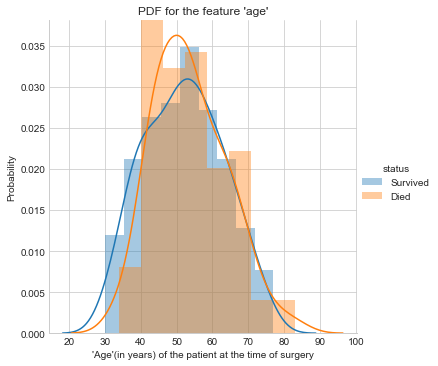

In [138]:
#Pdfs of the feature 'age'
import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(haberman_df, hue="status", size=5).map(sns.distplot, "age").add_legend();
plt.xlabel("'Age'(in years) of the patient at the time of surgery")
plt.ylabel("Probability")
plt.title("PDF for the feature 'age'")
plt.show()


##### **Observation:** 
As a rule of thumb, 'the farther the pdfs(well separable), the better the distiction between the classes' but both the pdfs are  almost symmetrical and overlapping to a larger extent. So, we won't be able to make much conclusions about the separation of 2 classes using 'age' as a feature.
Lets plot the pdfs for year and see if we can make any inferences.

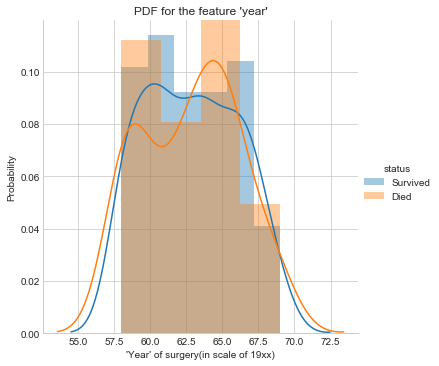

In [139]:
#Pdfs of the feature 'year'
sns.FacetGrid(haberman_df, hue="status", size=5).map(sns.distplot, "year").add_legend();
plt.xlabel("'Year' of surgery(in scale of 19xx)")
plt.ylabel("Probability")
plt.title("PDF for the feature 'year'")
plt.show()


##### **Observation:** 
As we can see both the pdfs are almost overlapping, even the feature 'year of surgery' does not help us to draw any conclusions.

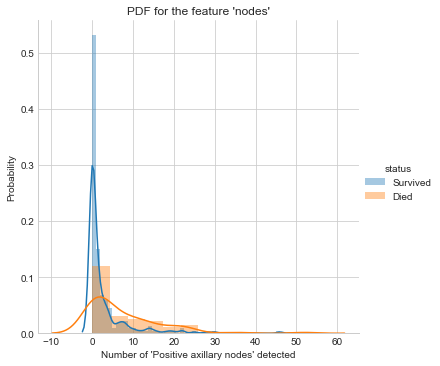

In [140]:
#Pdfs of the feature 'nodes'
sns.FacetGrid(haberman_df, hue="status", size=5).map(sns.distplot, "nodes").add_legend();
plt.xlabel("Number of 'Positive axillary nodes' detected")
plt.ylabel("Probability")
plt.title("PDF for the feature 'nodes'")
plt.show()

##### **Observations:** 
1. Although pdfs are overlapping, they are right-skewed. 
2. Maximum percentage of patients who had survived for more than 5 years had less than 10 positive axillary nodes but that does not itself suffice to say that patients with less than 10 nodes can survive for more than 5 years because pdf of 'Died' shows that even the significant number of patients with less than 10 nodes had not survived for more than 5 years.

With this tiny glimpse of observation, lets proceed the analysis to get further insights about the data. 


### **CDFs: **

CDF tells us what percentage of data-points that have a value(say 'x') less than or equal to 'x'.

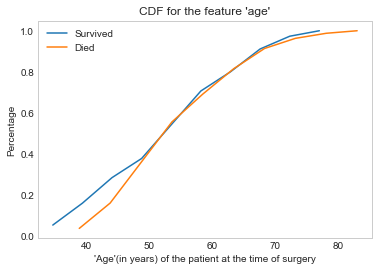

In [141]:
#Lets plot the CDFs.

haberman_df_survived = haberman_df.loc[haberman_df["status"] == "Survived"];
haberman_df_died = haberman_df.loc[haberman_df["status"] == "Died"];

counts_1, bin_edges_1 = np.histogram(haberman_df_survived['age'], bins=10, density = True)
pdf_1 = counts_1/(sum(counts_1))
cdf_1 = np.cumsum(pdf_1)
plt.plot(bin_edges_1[1:], cdf_1, label = "Survived")

counts_2, bin_edges_2 = np.histogram(haberman_df_died['age'], bins=10, density = True)
pdf_2 = counts_2/(sum(counts_2))
cdf_2 = np.cumsum(pdf_2)
plt.plot(bin_edges_2[1:], cdf_2, label = "Died")

plt.legend()
plt.xlabel("'Age'(in years) of the patient at the time of surgery")
plt.ylabel("Percentage")
plt.title("CDF for the feature 'age'")
plt.grid();
plt.show();

#### **Observations:**

Although we won't be able make any conclusions about the greater portion of the patients(of age from 50 years to 70 years) because the cdfs are almost overlapping, we can still infer some minor details as below.
1. 20% of the patients have survived for more than 5 years who are of age lesser than 40 years.
2. Patients have hardly survived for more than 5 years if they are very old(of age greater than around 75 years).

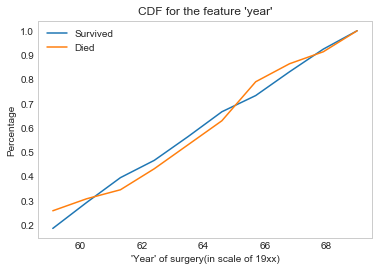

In [142]:
haberman_df_survived = haberman_df.loc[haberman_df["status"] == "Survived"];
haberman_df_died = haberman_df.loc[haberman_df["status"] == "Died"];

counts_1, bin_edges_1 = np.histogram(haberman_df_survived['year'], bins=10, 
                                 density = True)
pdf_1 = counts_1/(sum(counts_1))

cdf_1 = np.cumsum(pdf_1)
plt.plot(bin_edges_1[1:], cdf_1, label = "Survived")


counts_2, bin_edges_2 = np.histogram(haberman_df_died['year'], bins=10, 
                                 density = True)
pdf_2 = counts_2/(sum(counts_2))

cdf_2 = np.cumsum(pdf_2)
plt.plot(bin_edges_2[1:], cdf_2, label = "Died")

plt.legend()
plt.xlabel("'Year' of surgery(in scale of 19xx)")
plt.ylabel("Percentage")
plt.title("CDF for the feature 'year'")
plt.grid();
plt.show();

#### **Observation:**

As the cdfs are almost overlapping, year of surgery does not seems to have much impact on the patient's survival for more than 5 years.  

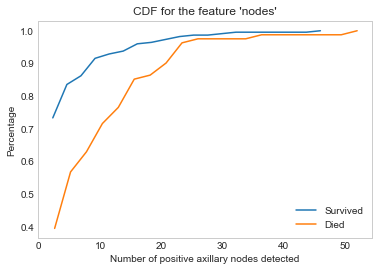

In [143]:
#Lets plot the CDFs.

haberman_df_survived = haberman_df.loc[haberman_df["status"] == "Survived"];
haberman_df_died = haberman_df.loc[haberman_df["status"] == "Died"];


counts_1, bin_edges_1 = np.histogram(haberman_df_survived['nodes'], bins=20, 
                                 density = True)
pdf_1 = counts_1/(sum(counts_1))

cdf_1 = np.cumsum(pdf_1)
plt.plot(bin_edges_1[1:], cdf_1, label = "Survived")


counts_2, bin_edges_2 = np.histogram(haberman_df_died['nodes'], bins=20, 
                                 density = True)
pdf_2 = counts_2/(sum(counts_2))

cdf_2 = np.cumsum(pdf_2)
plt.plot(bin_edges_2[1:], cdf_2, label = "Died")

plt.legend()
plt.xlabel("Number of positive axillary nodes detected")
plt.ylabel("Percentage")
plt.title("CDF for the feature 'nodes'")
plt.grid()
plt.show();


#### **Observations:**

1. Nearly 93% of the patients who have survived for more than 5 years had less than 10 positive axillary nodes.
2. Patients who had more than 45(approximately) positive axillary nodes have not been able to survive for more than 5 years.

This infers that larger number of positive axillary nodes leads to lesser chances of survival beyond 5 years. <br>

Now, lets see if box-plots can aid us in understanding the correlations between the features and class-labels.

### **Box-plots with whiskers: **

It gives us 25th, 50th, 75th percentile value of a feature.
By default, whiskers will be plotted by using maximum and minimum value.

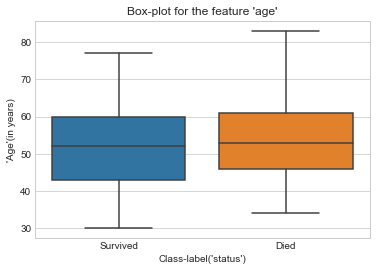

In [144]:
#Box-plot for 'age' feature
sns.boxplot(x='status', y='age', data=haberman_df)
plt.xlabel("Class-label('status')")
plt.ylabel("'Age'(in years)")
plt.title("Box-plot for the feature 'age'")
plt.show()

#### **Observations:**

As we can see, all the percentiles are pretty much overlapping for both the classes(Survived and Died). So, we can only make some minor conclusions as below.
1. 50% of the patients(nearly 112 patients) who had survived for more than 5 years are of age between approximately 42 to 60 years. Similarly, 50% of patients(nearly 40 patients) who did not survive for more than 5 years are of age between 45 to 60 years.
2. No patient has survived for more than 5 years if she had crossed 75 years.

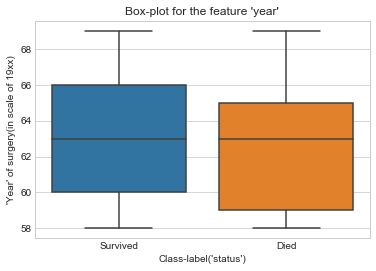

In [145]:
#Box-plot for 'year' feature
sns.boxplot(x='status', y='year', data=haberman_df)
plt.xlabel("Class-label('status')")
plt.ylabel("'Year' of surgery(in scale of 19xx)")
plt.title("Box-plot for the feature 'year'")
plt.show()

#### **Observations:**
1. 50% of the patients who had survived for more than 5 years had the surgery between 1960 and 1966. 
2. 50% of the patients who did not survive for more than 5 years had the surgery between 1959 and 1965.<br>

This observation hardly helps us in separating 2 class of points.

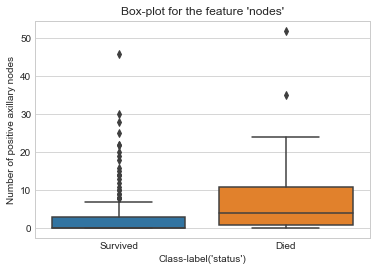

     age  year  nodes    status
174   54    67     46  Survived


In [147]:
#Box-plot for 'nodes' feature
sns.boxplot(x='status', y='nodes', data=haberman_df)
plt.xlabel("Class-label('status')")
plt.ylabel("Number of positive axillary nodes")
plt.title("Box-plot for the feature 'nodes'")
plt.show()
print("="*50)
print(haberman_df[(haberman_df['nodes'] > 30) & (haberman_df['status'] == 'Survived')])
print("="*50)

#### **Observations:**
1. As we can see, 75% of the patients(nearly 170 patients) who have survived for more than 5 years had less than 5 positive axillary nodes.
2. There was only one patient who was able to survive for more than 5 years even with 46 positive axillary nodes. It could be an outlier.

### **Violin plot: **
Box-plot gave us some understanding about the data. Now, lets look at violin plot and try to make some observations. <br> 
Violin plot gives us a combined plot which has both pdf and box-plot which helps us to know if the data-points are clustered around median, quantiles, maximum or minimum value.
It will also give us better visualization than pdfs because pdfs will be hard to interpret if we have multiple classes as pdfs for them would be overlapping.

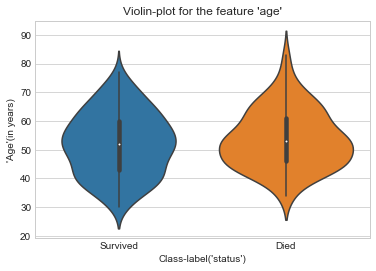

In [148]:
#Violin plot for 'age' feature
sns.violinplot(x="status", y="age", data=haberman_df, size=10)
plt.xlabel("Class-label('status')")
plt.ylabel("'Age'(in years)")
plt.title("Violin-plot for the feature 'age'")
plt.show()

#print(haberman_df_survived.age.median())
#print(haberman_df_died.age.describe([.25, .5]))

#### **Observations:**
As we can see, most of the patients who had survived for more than 5 years are grouped around the median(52) where as incase of patients who died within 5 years, there exists high density of patients between 1st quartile(46) and median(53). 

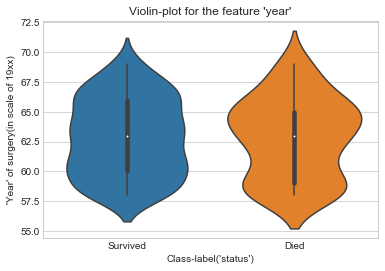

In [149]:
#Violin plot for 'year' feature
sns.violinplot(x="status", y="year", data=haberman_df, size=10)
plt.xlabel("Class-label('status')")
plt.ylabel("'Year' of surgery(in scale of 19xx)")
plt.title("Violin-plot for the feature 'year'")
plt.show()

#print(haberman_df_survived.year.describe([.25, .5, .75]))
#print(haberman_df_died.year.describe([.25, .5, .75]))

#### **Observations:**
Density of patients who had survived for more than 5 years is spreaded in the interquartile region(from 1960 to 1966). Points with respect to patients who died within 5 years are densely spreaded between the median and 3rd quartile(from 1963 to 1965). 

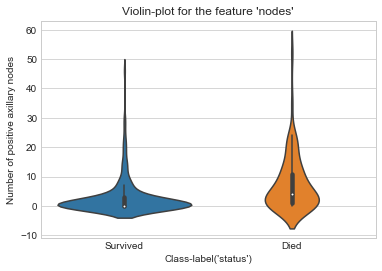

In [150]:
#Violin plot for 'nodes' feature
sns.violinplot(x="status", y="nodes", data=haberman_df, size=10)
plt.xlabel("Class-label('status')")
plt.ylabel("Number of positive axillary nodes")
plt.title("Violin-plot for the feature 'nodes'")
plt.show()

#### **Observations:**
Most of the patients who had survived for more than 5 years had very few positive axillary nodes(well below 10) but we can notice that the significant number of patients who did not survive for more than 5 years also had less than 10 positive axillary nodes.

Even though violin-plot gave us some understanding about the data but it did not define any clear-cut boundary to separate the 2 classes.

With these insights about the data, lets move on to bivariate analysis.

### **Bivariate analysis: **
- Bivariate analysis is performed by taking 2 features at a time. <br>
- It is beneficial for us to know if a combination of features can separate 2 classes(Survived and Died).

### **Pair plot: **

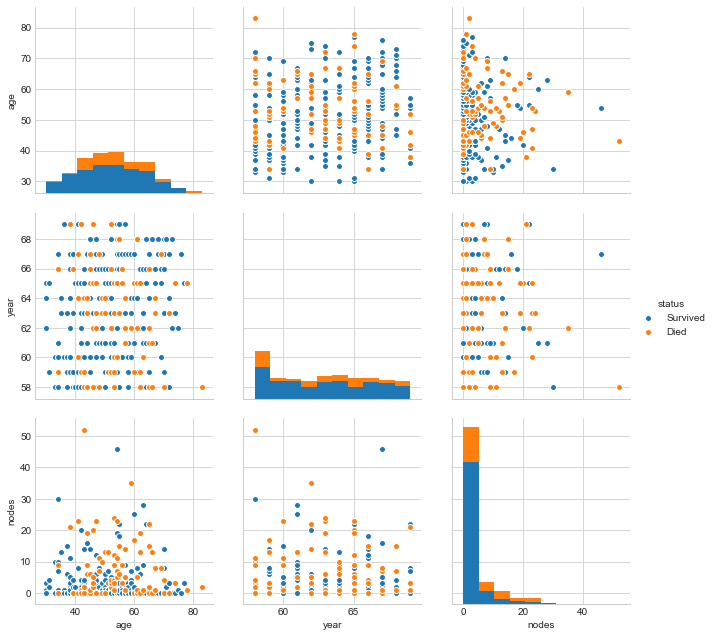

In [151]:
#Pair-plot for all the pair of features.
sns.set_style("whitegrid");
sns.pairplot(haberman_df, hue="status", size=3);
plt.show()

#### **Observations:**

1. Plots on the diagonal represents the histogram for each feature.
2. Plots off the diagonal are symmetric to each other where each plot representing the plot between a pair of feature.

Plots between 'age' vs 'year' and 'nodes' vs 'age' are useful in finding some inferences which are illustrated below.

### **Scatter plot: **

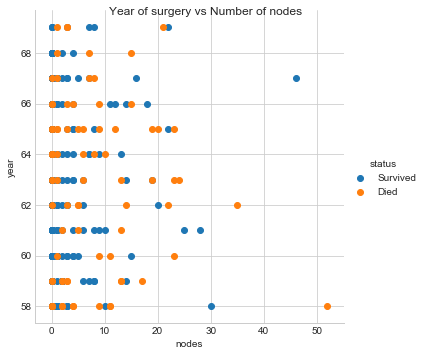

In [152]:
#Plot between number of nodes and year of surgery.
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df, hue="status", size=5).map(plt.scatter, "nodes", "year").add_legend().fig.suptitle('Year of surgery vs Number of nodes');


#### **Observations:**
As most of the points are scattered, we won't be able to make much conclusions. Lets see if we can draw some conclusions using other pair of features.

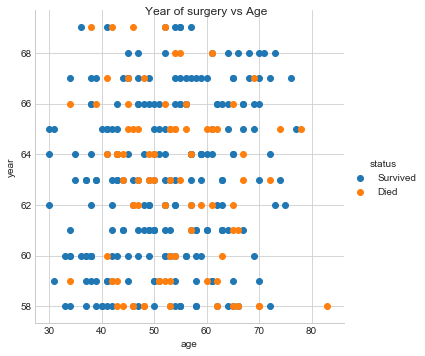

In [153]:
#Plot between age and year of surgery.
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df, hue="status", size=5).map(plt.scatter, "age", "year").add_legend().fig.suptitle('Year of surgery vs Age');


#print("="*50)
#haberman_df[((haberman_df['age'] > 30) & (haberman_df['age'] < 40 )) & ((haberman_df['year'] > 58) & (haberman_df['year'] < 65))]['status'].value_counts()


#### **Observations:**
Although most of the points are scattered, if age of the patients is between 30 & 40 years and if these patients had underwent surgery from 1958 to 1965 then most of these patients(22 patients out of 23) have survived for more than 5 years.

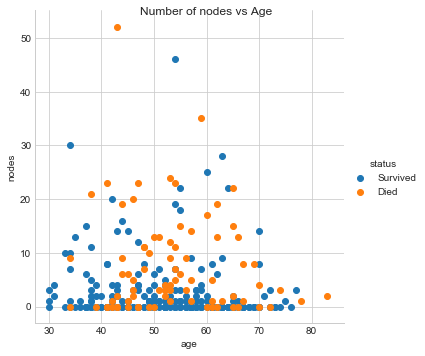

In [155]:
##Plot between age and number of positive axillary nodes.
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df, hue="status", size=5).map(plt.scatter, "age", "nodes").add_legend().fig.suptitle('Number of nodes vs Age');


#haberman_df[((haberman_df['age'] > 30) & (haberman_df['age'] < 40 )) & ((haberman_df['nodes'] >= 0) & (haberman_df['nodes'] <= 30 ))]['status'].value_counts()
#haberman_df[haberman_df['nodes'] <= 30]['status'].value_counts()

#### **Observations:**
- Nearly 90% of the patients with less than 30 nodes(30 is chosen since 99% of the patients had less than 30 nodes) who were aged between 30 & 40 years had survived for more than 5 years.
- As they get older(from 40 to 80 years), only 70% of them had survived beyond 5 years even if they had less than 30 nodes.

### **Summary of EDA:**

- Based on the above analysis, if I would like to rate the importance of features then I would rate it as below.
  1. Number of positive axillary nodes detected: <br>
      Chances of survival of a patient will be high if the number of nodes detected are less(well below 10).
  2. Age of the patient at the time of surgery: <br>
      Possibility of survival of patients who are less than 40 years is higher than the possibility of survival of patients who have crossed 40 years.
  3. Year in which patient had undergone surgery: <br>
      Survival of a patient does not depend much on the year of surgery.
    
    
- Bivariate analysis between age of the patient and number of positive axillary nodes detected infers that if the patients are of age from 30 to 40 years who have less than 30 positive axillary nodes have higher chances of survival for more than 5 years than other patients.



### **Conclusion:** 
How much does the above analysis meets the objective(predicting the survival of cancer patients for more than 5 years)? <br>

Given a patient's age & number of positive axillary nodes detected, we would definitely be able to give a probabilistic prediction about the patient's survival for more than 5 years but we may not be able to exactly say that a patient will survive or not.



In [184]:
#References:

#https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes
#https://ww5.komen.org/uploadedFiles/_Komen/Content/About_Breast_Cancer/Tools_and_Resources/Fact_Sheets_and_Breast_Self_Awareness_Cards/AxillaryLymphNodes.pdf
#https://www.cancer.gov/publications/dictionaries/cancer-terms/def/lymph-node
#https://www.livescience.com/26983-lymphatic-system.html
#https://www.kaggle.com/ashteotia/eda-on-haberman-survival-dataset
#https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673
#https://medium.com/@gokulkarthikk/habermans-cancer-survival-visual-exploratory-data-analysis-using-python-e7dcb7ac01ed
#https://www.thoughtco.com/lymph-nodes-anatomy-373244
#https://www.medicalnewstoday.com/articles/325654.php
#https://www.cancer.gov/types/breast/risk-fact-sheet
#https://www.cancer.org/content/dam/cancer-org/research/cancer-facts-and-statistics/annual-cancer-facts-and-figures/2017/cancer-facts-and-figures-2017.pdf
#https://mode.com/blog/violin-plot-examples
#https://stackoverflow.com/questions/3003476/get-underlined-text-with-markdown
#https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook
#https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm
#https://www.sciencedirect.com/topics/mathematics/cumulative-distribution-function
#https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot